# Мазенков Михаил Александрович

# Вариант 2

### 1. Подсчитайте количество отменённых рейсов.

In [346]:
import pandas as pd

In [347]:
df = pd.read_csv('flights.csv', nrows=500000)

In [348]:
df.head(20)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [349]:
print("Количество отменённых рейсов =",df[df['CANCELLED']==1].shape[0])

Количество отменённых рейсов = 16824


### 2. Определите аэропорт, рейсы для которого отменяются наиболее часто.

In [350]:
count = df.groupby('ORIGIN_AIRPORT')[['CANCELLED']].count()
port = count.sort_values(by=['CANCELLED'], ascending=False).head(3)
print(port)

                CANCELLED
ORIGIN_AIRPORT           
ATL                 31332
ORD                 24967
DFW                 24651


### 3. Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. Оцените значение p-value. Постройте плотность распределения признаков.

In [351]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
%matplotlib inline


In [352]:
pears_day = pearsonr(df['CANCELLED'],df['DAY_OF_WEEK'])
spearm_day = spearmanr(df['CANCELLED'],df['DAY_OF_WEEK'])

print("День недели")
print("Коэффициент корреляции Пирсона: ",pears_day)
print("Коэффициент корреляции Спирмена: ",spearm_day)
                          
if (spearm_day[1]<0.05):
    print("p-value is good")
else:
    print("p-value is not good")

День недели
Коэффициент корреляции Пирсона:  (-0.070560432734448467, 0.0)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=-0.069086431759161737, pvalue=0.0)
p-value is good


In [353]:
pears_m = pearsonr(df['CANCELLED'],df['MONTH'])
spearm_m = spearmanr(df['CANCELLED'],df['MONTH'])

print("Месяц")
print("Коэффициент корреляции Пирсона: ",pears_m)
print("Коэффициент корреляции Спирмена: ",spearm_m)
      
if (spearm_day[1]<0.05):
    print("p-value is good")
else:
    print("p-value is not good")

Месяц
Коэффициент корреляции Пирсона:  (0.17885181785805138, 0.0)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=0.17885181785805146, pvalue=0.0)
p-value is good


In [354]:
label_encoder = LabelEncoder()
air = pd.Series(label_encoder.fit_transform(df['AIRLINE']))

pears_a = pearsonr(df['CANCELLED'],air)
spearm_a = spearmanr(df['CANCELLED'],air)

print("Авиакомпания")
print("Коэффициент корреляции Пирсона: ",pears_a)
print("Коэффициент корреляции Спирмена: ",spearm_a)
      
if (spearm_day[1]<0.05):
    print("p-value is good")
else:
    print("p-value is not good")

Авиакомпания
Коэффициент корреляции Пирсона:  (-0.0041752273620301646, 0.0031537845993512828)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=-0.0054718462429356124, pvalue=0.00010919355040687292)
p-value is good


In [355]:
port = pd.Series(label_encoder.fit_transform(df['ORIGIN_AIRPORT']))

pears_p = pearsonr(df['CANCELLED'], port)
spearm_p = spearmanr(df['CANCELLED'], port)

print("Аэропорт")
print("Коэффициент корреляции Пирсона: ",pears_p)
print("Коэффициент корреляции Спирмена: ",spearm_p)
       
if (spearm_day[1]<0.05):
    print("p-value is good")
else:
    print("p-value is not good")

Аэропорт
Коэффициент корреляции Пирсона:  (-0.0048435544723469557, 0.00061497654543681913)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=-0.0037055248952083315, pvalue=0.0087877123098929408)
p-value is good


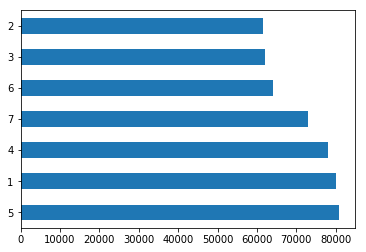

In [356]:
df['DAY_OF_WEEK'].value_counts().plot.barh()

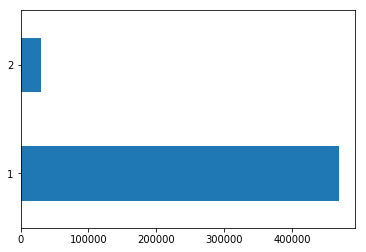

In [357]:
df['MONTH'].value_counts().plot.barh()


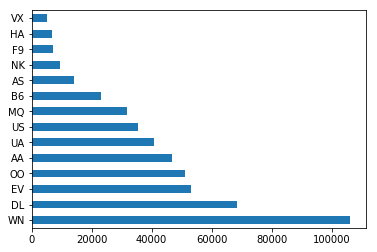

In [358]:
df['AIRLINE'].value_counts().plot.barh()


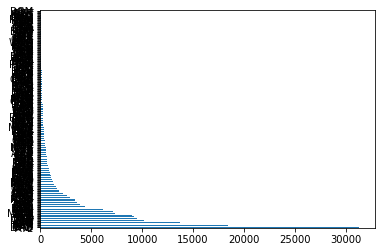

In [359]:
df['ORIGIN_AIRPORT'].value_counts().plot.barh()

### 4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.

In [360]:
print("Для AS")
print("Количество рейсов =", df[df['AIRLINE']=='AS']['FLIGHT_NUMBER'].count())
print("Количество отменённых рейсов =",df[(df['AIRLINE']=='AS') & (df['CANCELLED']==1)].shape[0])
print("Количество перенаправленных рейсов =",df[(df['AIRLINE']=='AS') & (df['DIVERTED']==1)].shape[0])
print("Для AA")
print("Количество рейсов =", df[df['AIRLINE']=='AA']['FLIGHT_NUMBER'].count())
print("Количество отменённых рейсов =",df[(df['AIRLINE']=='AA') & (df['CANCELLED']==1)].shape[0])
print("Количество перенаправленных рейсов =",df[(df['AIRLINE']=='AA') & (df['DIVERTED']==1)].shape[0])
print("Для US")
print("Количество рейсов =", df[df['AIRLINE']=='US']['FLIGHT_NUMBER'].count())
print("Количество отменённых рейсов =",df[(df['AIRLINE']=='US') & (df['CANCELLED']==1)].shape[0])
print("Количество перенаправленных рейсов =",df[(df['AIRLINE']=='US') & (df['DIVERTED']==1)].shape[0])

Для AS
Количество рейсов = 14149
Количество отменённых рейсов = 83
Количество перенаправленных рейсов = 46
Для AA
Количество рейсов = 46950
Количество отменённых рейсов = 1324
Количество перенаправленных рейсов = 110
Для US
Количество рейсов = 35591
Количество отменённых рейсов = 1268
Количество перенаправленных рейсов = 73


### 5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний.


In [361]:
df['SPEED'] = df['DISTANCE']/df['AIR_TIME']
df[['AIRLINE','DISTANCE' , 'AIR_TIME', 'SPEED']].head()

,AIRLINE,DISTANCE,AIR_TIME,SPEED
0,AS,1448,169.0,8.568047
1,AA,2330,263.0,8.859316
2,US,2296,266.0,8.631579
3,AA,2342,258.0,9.077519
4,AS,1448,199.0,7.276382


In [362]:
print("Средняя скорость полёта для AS = ", df[(df['AIRLINE']=='AS')]['SPEED'].mean())
print("Средняя скорость полёта для AA = ", df[(df['AIRLINE']=='AA')]['SPEED'].mean())
print("Средняя скорость полёта для US = ", df[(df['AIRLINE']=='US')]['SPEED'].mean())

Средняя скорость полёта для AS =  7.191532179540095
Средняя скорость полёта для AA =  7.178043970834927
Средняя скорость полёта для US =  6.786169926660631


### 6. Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов).

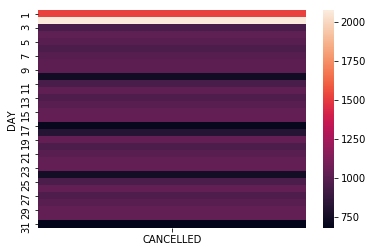

In [363]:
import seaborn as sns
df = pd.read_csv('flights.csv', nrows=500000)
frame = df[df['ORIGIN_AIRPORT']=='ATL']
count = frame.groupby('DAY')[['CANCELLED']].count()
sns.heatmap(count)

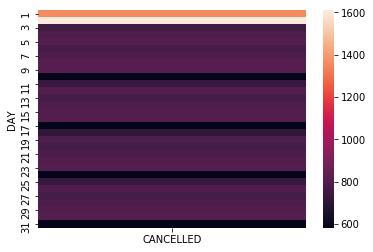

In [364]:
df = pd.read_csv('flights.csv', nrows=500000)
frame = df[df['ORIGIN_AIRPORT']=='ORD']
count = frame.groupby('DAY')[['CANCELLED']].count()
sns.heatmap(count)

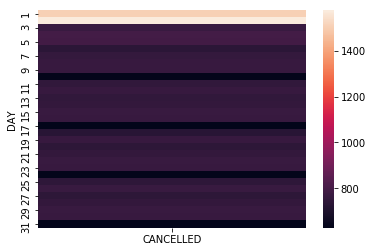

In [365]:
df = pd.read_csv('flights.csv', nrows=500000)
frame = df[df['ORIGIN_AIRPORT']=='DFW']
count = frame.groupby('DAY')[['CANCELLED']].count()
sns.heatmap(count)

### 7. Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.

    DEPARTURE_DELAY  ARRIVAL_DELAY
1              -8.0           -9.0
3              -5.0           -9.0
7              14.0          -10.0
12              0.0           -4.0
23             -2.0          -12.0


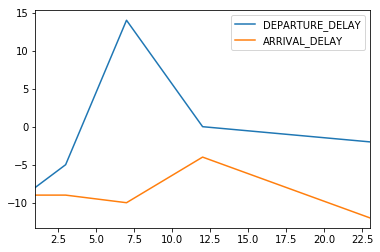

In [366]:
frame = df[df['ORIGIN_AIRPORT']=='LAX'].head()
LAX = frame[['DEPARTURE_DELAY' , 'ARRIVAL_DELAY']].head(20)
print(LAX)
LAX.plot()

    DEPARTURE_DELAY  ARRIVAL_DELAY
0             -11.0          -22.0
15             -4.0          -14.0
16            -14.0          -24.0
18             -4.0          -18.0
32              NaN            NaN


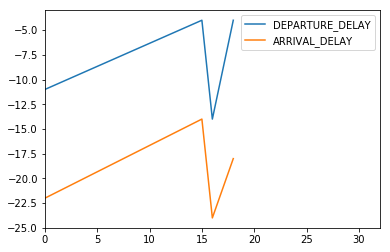

In [367]:
frame = df[df['ORIGIN_AIRPORT']=='ANC'].head()
ANC = frame[['DEPARTURE_DELAY' , 'ARRIVAL_DELAY']].head(20)
print(ANC)
ANC.plot()

    DEPARTURE_DELAY  ARRIVAL_DELAY
2              -2.0            5.0
5              -5.0            8.0
8             -11.0          -13.0
17             -6.0           -7.0
92             19.0           26.0


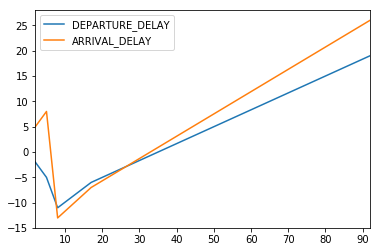

In [368]:
frame = df[df['ORIGIN_AIRPORT']=='SFO'].head()
SFO = frame[['DEPARTURE_DELAY' , 'ARRIVAL_DELAY']].head(20)
print(SFO)
SFO.plot()

### 8. Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине.

B    271
A     64
C      7
Name: CANCELLATION_REASON, dtype: int64


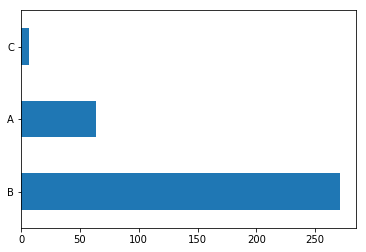

In [369]:
df = pd.read_csv('flights.csv', nrows=500000)
frame = df[df['ORIGIN_AIRPORT']=='ATL']
rea = frame['CANCELLATION_REASON'].value_counts()
print(rea)
rea.plot.barh()

B    1154
C     647
A     267
Name: CANCELLATION_REASON, dtype: int64


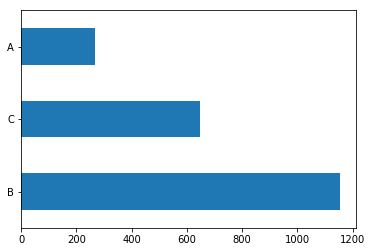

In [370]:
frame = df[df['ORIGIN_AIRPORT']=='ORD']
rea = frame['CANCELLATION_REASON'].value_counts()
print(rea)
rea.plot.barh()

B    370
A    219
C     16
Name: CANCELLATION_REASON, dtype: int64


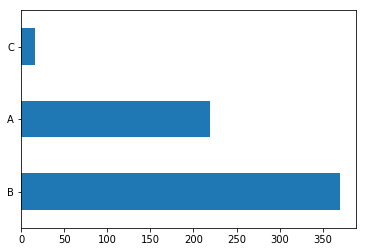

In [371]:
frame = df[df['ORIGIN_AIRPORT']=='DFW']
rea = frame['CANCELLATION_REASON'].value_counts()
print(rea)
rea.plot.barh()

### 9. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию.

In [372]:
count = df.groupby('AIRLINE')[['DEPARTURE_DELAY']].max()
port = count.sort_values(by=['DEPARTURE_DELAY'], ascending=False).head(1)
print("Авиакомпания с максимальной задержкой по отправке")
print(port)

Авиакомпания с максимальной задержкой по отправке
         DEPARTURE_DELAY
AIRLINE                 
AA                1988.0


In [373]:
count = df.groupby('AIRLINE')[['ARRIVAL_DELAY']].max()
port = count.sort_values(by=['ARRIVAL_DELAY'], ascending=False).head(1)
print("Авиакомания с максимальной задержкой по прибытию")
print(port)

Авиакомания с максимальной задержкой по прибытию
         ARRIVAL_DELAY
AIRLINE               
AA              1971.0


# Конец